In [20]:
# IMPORT TOOLS
import sys
import subprocess
# sys.path.insert(1, f"{subprocess.Popen(['git', 'rev-parse', '--show-toplevel'], stdout=subprocess.PIPE).communicate()[0].rstrip().decode('utf-8')}/logistics/tools")
sys.path.insert(0, "/Users/sigge/GitHub/master-project/logistics")
from tools import run_tools
from tools  import image_to_thesis
image_to_thesis.pull_from_thesis()
# ------------

pull_from_thesis: Pulling from master-thesis repository
pull_from_thesis: Done


8
{'eps': 8.794552420197085, 'A': 62, 'Z': 28}
save: Saving binding_energy_vs_Z.pdf to theory
pull_from_thesis: Pulling from master-thesis repository
pull_from_thesis: Done
push_to_thesis: Pushing to master-thesis repository
push_to_thesis: Done


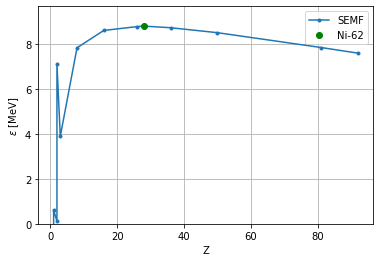

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
me=5.48579909070e-4 #u
mn=1.00866491588    #u
mp=1.007276466621   #u
muc2=931.49410242 #MeV

nuclides={'H2': {'Z': 1, 'A': 2, 'm': 2.01410177812},
        'H3': {'Z': 1, 'A': 3, 'm': 3.0160492779},
        'He3': {'Z': 2, 'A': 3, 'm': 3.0160293201},
        'He4': {'Z': 2, 'A': 4, 'm': 4.002603254},
        'Li6': {'Z': 3, 'A': 6, 'm': 6.0151228874},
        'O16': {'Z': 8, 'A': 16, 'm': 15.99491461957},
        'S34': {'Z': 16, 'A': 34, 'm': 33.96786701},
        'Fe56': {'Z': 26, 'A': 56, 'm': 55.9349375},
        'Ni62': {'Z': 28, 'A': 62, 'm': 61.92834537},
        'Kr84': {'Z': 36, 'A': 84, 'm': 83.9114977282},
        'Sn119': {'Z': 50, 'A': 119, 'm': 118.90331117},
        'Ti205': {'Z': 81, 'A': 205, 'm': 204.9744278},
        'U238': {'Z': 92, 'A': 238, 'm': 238.0507884}}

def BAZ(A,Z,m):
    """Function to calculate the binding energy per nucleon
    
    Parameters
    ----------
    A : int
        Mass number of nuclide
    Z : int
        Proton number of nuclide
    m : float
        Mass of the nuclide
    """
    eps = (Z*mp + (A - Z)*mn - (m - Z*me)) * muc2
    return eps/A

def BAZ_BW(A,Z):
    """Function to calculate the binding energy per nucleon
    with the semi-empirical formula
    
    Parameters
    ----------
    A : int
        Mass number of nuclide
    Z : int
        Proton number of nuclide
    """
    N = A - Z
    even_even = (Z % 2 == 0) and (N % 2 == 0)
    odd_odd = (Z % 2 == 1) and (N % 2 == 1)
    delta = 0
    if even_even: delta = 1
    elif odd_odd: delta = -1
    
    eps = 15.75*A-94.8*(A/2 - Z)**2/A-17.8*A**(2/3)-0.71*Z**2*A**(-1/3)+34*delta*A**(-3/4)
    return eps/A

#your code to apply these functions and to plot the results comes here.
eps_from_nucleus_mass = {k:{"eps": BAZ(v["A"], v["Z"], v["m"]), "A": v["A"], "Z": v["Z"]} for (k,v) in nuclides.items()}
eps_from_semf = {k:{"eps": BAZ_BW(v["A"], v["Z"]), "A": v["A"], "Z": v["Z"]} for (k,v) in nuclides.items()}

x_from_nucleus_mass = [v["Z"] for (k,v) in eps_from_nucleus_mass.items()]
y_from_nucleus_mass = [v["eps"] for (k,v) in eps_from_nucleus_mass.items()]
x_from_semf = [v["Z"] for (k,v) in eps_from_semf.items()]
y_from_semf = [v["eps"] for (k,v) in eps_from_semf.items()]

# Find the nucleide with largest binding energy per nucleon
max_idx = np.argmax(y_from_nucleus_mass)
max_val = list(nuclides)[max_idx]
max_dict_val = eps_from_nucleus_mass[max_val]
print(max_idx)
print(max_dict_val)

plt.figure()
plt.plot(x_from_semf, y_from_semf, ".-", label="SEMF")
plt.plot(x_from_semf[max_idx], y_from_semf[max_idx], "go", label="Ni-62")
# plt.plot(x_from_nucleus_mass, y_from_nucleus_mass, "ro", label="From nucleus mass")
plt.legend()
plt.ylim(0)
plt.grid()
plt.xlabel("Z")
plt.ylabel(r"$\epsilon$ [MeV]")

image_to_thesis.save(plt, image_to_thesis.ThesisSection.THEORY, "binding_energy_vs_Z.pdf")

plt.show()

# # plt.annotate(f"{list(nuclides)[max_idx]}", (max_dict_val["Z"], max_dict_val["eps"]-1))

In [28]:
for nuclide in nuclides:
    # Get the letters of the nuclide
    letters = "".join([letter for letter in nuclide if letter.isalpha()])
    numbers = "".join([letter for letter in nuclide if not letter.isalpha()])
    print(f"\\nuclei{{{letters}}}{{{numbers}}}", end=", ")

\nuclei{H}{2}, \nuclei{H}{3}, \nuclei{He}{3}, \nuclei{He}{4}, \nuclei{Li}{6}, \nuclei{O}{16}, \nuclei{S}{34}, \nuclei{Fe}{56}, \nuclei{Ni}{62}, \nuclei{Kr}{84}, \nuclei{Sn}{119}, \nuclei{Ti}{205}, \nuclei{U}{238}, 